In [1]:
from sklearn.datasets import make_moons
data = make_moons(n_samples=400, shuffle=True, noise=0.3, random_state=42)

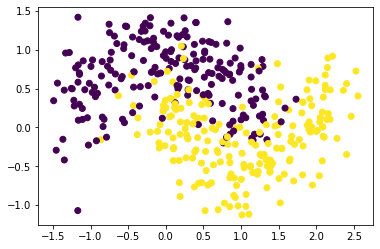

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data[0][:,0], data[0][:,1], c=data[1])

In [3]:
labels = [ 1 if data[1][i] > 0 else -1 for i in range(len(data[1]))]
len(labels)

400

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[0], labels, test_size=0.2, random_state=42)

In [5]:
X_test.shape

(80, 2)

In [6]:
import numpy as np

f1_train = X_train[:, 0]
f2_train = X_train[:, 1]

w1 = np.zeros(f1_train.shape)
w2 = np.zeros(f2_train.shape)

In [7]:
iters = 1
alpha = 0.001

while iters < 10000:
    prod = (w1 * f1_train + w2 * f2_train) * y_train
    if iters % 100 == 0:
        print(cost)
    i = 0
    for val in prod:
        if val >= 1:
            cost = 0
            w1 -= alpha * (2 * 1/iters * w1)
            w2 -= alpha * (2 * 1/iters * w2)
        else:
            cost = 1 - val
            w1 += alpha * (f1_train[i] * y_train[i] - 2 * 1/iters * w1)
            w2 += alpha * (f2_train[i] * y_train[i] - 2 * 1/iters * w2)
        i += 1
    iters += 1

1.388708051059624
1.3533045986201784
1.3124948725902892
1.3189879945828458
1.3303145875849074
1.3288785017388238
1.3252478001386865
1.3203341086448221
1.3039585968917846
1.2992741209953298
1.316601230930204
1.3140995845696308
1.315326307143997
1.3128902977334507
1.3155964965340996
1.3148822750275466
1.3154010473097362
1.3132826932912827
1.3118461821365839
1.311035624947921
1.3076857239450164
1.307688127116359
1.308723787384789
1.30702785104208
1.307685529758269
1.3052882814123543
1.3040629907391468
1.3066612794665122
1.3046372019663393
1.3032661968005632
1.3005504546165376
1.2989375843658617
1.297546610614531
1.2963773678727117
1.292896693932221
1.2896208995597263
1.2865396770424609
1.2847742936627893
1.284907597501559
1.2863657864907385
1.2858296906692237
1.2864767197646088
1.2859065035356008
1.2859739597079713
1.286011503916225
1.2866779853499557
1.2861090791881105
1.286160829352696
1.2862951149390043
1.2839884636422734
1.2842832320909057
1.2846552307700234
1.282581016682101
1.283103

In [8]:
f1_test = X_test[:, 0]
f2_test = X_test[:, 1]

w1 = w1[:f1_test.shape[0]]
w2 = w2[:f2_test.shape[0]]

In [9]:
y_pred = w1 * f1_test + w2 * f2_test
preds = []

for val in y_pred:
    if val > 1:
        preds.append(1)
    else:
        preds.append(-1)

### MY SVM MODEL

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.725


### SKLEARN SVM

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9


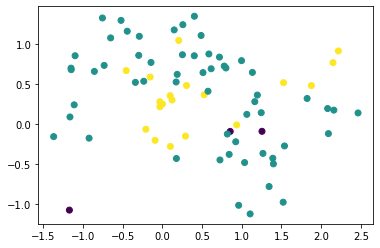

In [12]:
plt.scatter(f1_test, f2_test, c=np.subtract(y_test, preds))